<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_cluster_data_add_delta_0_8_n30_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/addition_pattern/addition_delta_0.8'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_0.8_n30.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,78.048444,91.831350,97.596089,-32.890703,244.585181,276.805613,-32.220432
1,0.0,1.0,45.851362,86.769215,96.059515,-40.198339,198.481752,234.166259,-35.684507
2,0.0,2.0,75.049666,93.730953,55.710068,-29.888287,204.602400,222.367155,-17.764755
3,0.0,3.0,62.943601,24.098759,91.283456,9.569258,197.895075,197.439669,0.455406
4,0.0,4.0,55.348104,49.686755,32.176677,-23.940104,123.271432,135.137291,-11.865860
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,42.386075,82.429700,46.226158,12.277067,193.319000,161.400693,31.918307
19996,999.0,16.0,60.544786,32.149069,26.157401,-12.660803,116.190453,125.844993,-9.654541
19997,999.0,17.0,42.742809,86.725664,40.049952,0.877972,180.396398,158.072978,22.323420
19998,999.0,18.0,97.010707,34.891688,37.682793,3.508470,183.093657,184.344601,-1.250943


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat      e_hat
rep   index                                   ...                                   
0.0   0.0    78.048444  91.831350  97.596089  ...  244.585181  276.805613 -32.220432
      1.0    45.851362  86.769215  96.059515  ...  198.481752  234.166259 -35.684507
      2.0    75.049666  93.730953  55.710068  ...  204.602400  222.367155 -17.764755
      3.0    62.943601  24.098759  91.283456  ...  197.895075  197.439669   0.455406
      4.0    55.348104  49.686755  32.176677  ...  123.271432  135.137291 -11.865860
...                ...        ...        ...  ...         ...         ...        ...
999.0 15.0   42.386075  82.429700  46.226158  ...  193.319000  161.400693  31.918307
      16.0   60.544786  32.149069  26.157401  ...  116.190453  125.844993  -9.654541
      17.0   42.742809  86.725664  40.049952  ...  180.396398  158.072978  22.323420
      18.0   97.010707  34.891688  37.682793  ...  183.093657  184.344601  -1.250943
      19.0   35.135317  27.806599  90.045177  ...  146.598684  162.332557 -15.733873

[20000 rows x 7 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat      e_hat
rep   index                                   ...                                   
0.0   0.0    78.048444  91.831350  97.596089  ...  244.585181  276.805613 -32.220432
      1.0    45.851362  86.769215  96.059515  ...  198.481752  234.166259 -35.684507
      2.0    75.049666  93.730953  55.710068  ...  204.602400  222.367155 -17.764755
      3.0    62.943601  24.098759  91.283456  ...  197.895075  197.439669   0.455406
      4.0    55.348104  49.686755  32.176677  ...  123.271432  135.137291 -11.865860
...                ...        ...        ...  ...         ...         ...        ...
999.0 15.0   42.386075  82.429700  46.226158  ...  193.319000  161.400693  31.918307
      16.0   60.544786  32.149069  26.157401  ...  116.190453  125.844993  -9.654541
      17.0   42.742809  86.725664  40.049952  ...  180.396398  158.072978  22.323420
      18.0   97.010707  34.891688  37.682793  ...  183.093657  184.344601  -1.250943
      19.0   35.135317  27.806599  90.045177  ...  146.598684  162.332557 -15.733873

[20000 rows x 7 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,78.048444,91.831350,97.596089,-32.890703,244.585181,276.805613,-32.220432
1,0.0,1.0,45.851362,86.769215,96.059515,-40.198339,198.481752,234.166259,-35.684507
2,0.0,2.0,75.049666,93.730953,55.710068,-29.888287,204.602400,222.367155,-17.764755
3,0.0,3.0,62.943601,24.098759,91.283456,9.569258,197.895075,197.439669,0.455406
4,0.0,4.0,55.348104,49.686755,32.176677,-23.940104,123.271432,135.137291,-11.865860
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,42.386075,82.429700,46.226158,12.277067,193.319000,161.400693,31.918307
19996,999.0,16.0,60.544786,32.149069,26.157401,-12.660803,116.190453,125.844993,-9.654541
19997,999.0,17.0,42.742809,86.725664,40.049952,0.877972,180.396398,158.072978,22.323420
19998,999.0,18.0,97.010707,34.891688,37.682793,3.508470,183.093657,184.344601,-1.250943


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3  ...           Y       y_hat      e_hat
rep   index                                   ...                                   
0.0   0.0    78.048444  91.831350  97.596089  ...  244.585181  276.805613 -32.220432
      1.0    45.851362  86.769215  96.059515  ...  198.481752  234.166259 -35.684507
      2.0    75.049666  93.730953  55.710068  ...  204.602400  222.367155 -17.764755
      3.0    62.943601  24.098759  91.283456  ...  197.895075  197.439669   0.455406
      4.0    55.348104  49.686755  32.176677  ...  123.271432  135.137291 -11.865860
...                ...        ...        ...  ...         ...         ...        ...
999.0 15.0   42.386075  82.429700  46.226158  ...  193.319000  161.400693  31.918307
      16.0   60.544786  32.149069  26.157401  ...  116.190453  125.844993  -9.654541
      17.0   42.742809  86.725664  40.049952  ...  180.396398  158.072978  22.323420
      18.0   97.010707  34.891688  37.682793  ...  183.093657  184.344601  -1.250943
      19.0   35.135317  27.806599  90.045177  ...  146.598684  162.332557 -15.733873

[20000 rows x 7 columns]

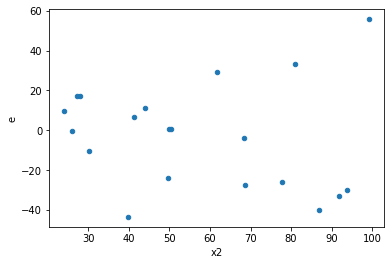

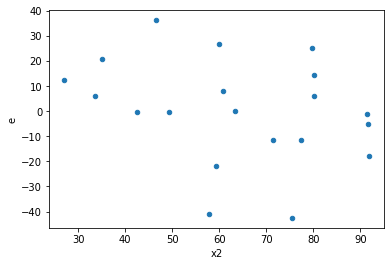

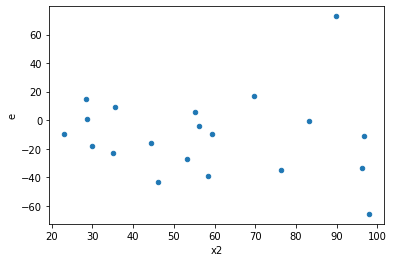

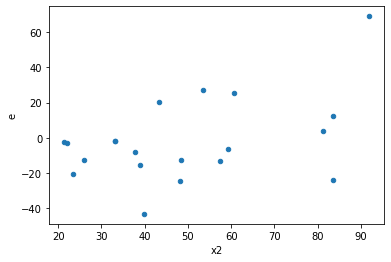

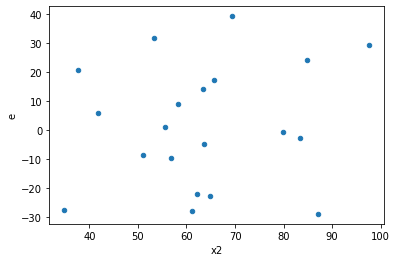

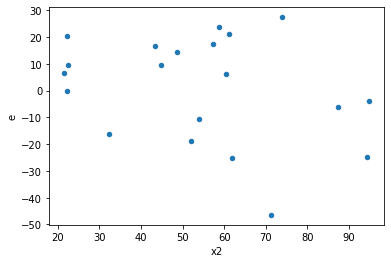

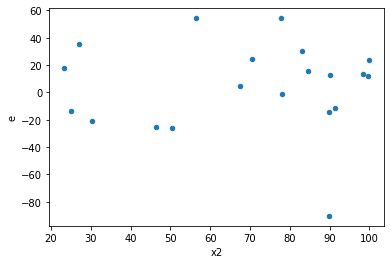

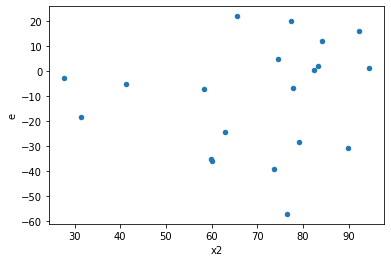

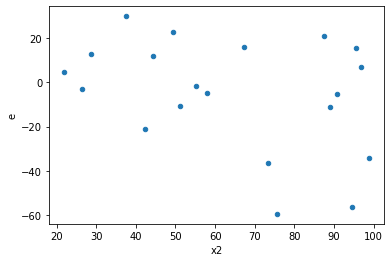

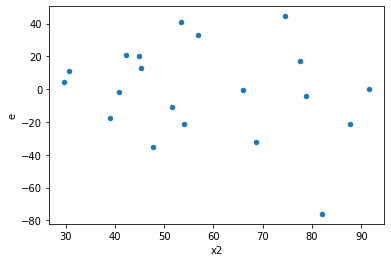

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["x1", "x2", "x3"]]
    k_means = KMeans(n_clusters=2)
    model = k_means.fit(x)
    model

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = k_means.predict(x)
    y_kmeans

    # kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    data_sort_clusters = data_clusters.sort_values('clusters')
    data_sort_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster1 = data_sort_clusters[data_sort_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSR1 = model1.ssr
    MSE1 = model1.mse_resid

    # กลุ่มที่ 2
    data_cluster0 = data_sort_clusters[data_sort_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model0 = sm.OLS(y, x).fit()

    DF0 = model0.df_resid + 1
    SSR0 = model0.ssr
    MSE0 = model0.mse_resid

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSR1/DF1) / (SSR0/DF0)

    df1 = DF1
    df0 = DF0

    # คำนวณค่า p-value
    # sf(x, dfn, dfd, loc=0, scale=1) : Survival function (also defined as 1 - cdf, but sf is sometimes more accurate)
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df0)))

    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df0)
    
    return df0, df1, SSR0, SSR1, MSE0, MSE1, GQ_test_clusters, two_tailed, p_greater

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df0=[]
list_df1=[]
list_SSR0=[]
list_SSR1=[]
list_MSE0=[]
list_MSE1=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df0, df1, SSR0, SSR1, MSE0, MSE1, GQ_test_clusters, two_tailed, p_greater=get_result(run_replicate)

    list_df0.append(df0)
    list_df1.append(df1)
    list_SSR0.append(SSR0)
    list_SSR1.append(SSR1)
    list_MSE0.append(MSE0)
    list_MSE1.append(MSE1)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1665: RuntimeWarning: divide by zero encountered in double_scalars
  return self.ssr/self.df_resid
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1665: RuntimeWarning: divide by zero encountered in double_scalars
  return self.ssr/self.df_resid
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1665: RuntimeWarning: divide by zero encountered in double_scalars
  return self.ssr/self.df_resid
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1665: RuntimeWarning: divide by zero encountered in double_scalars
  return self.ssr/self.df_resid
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1665: RuntimeWarning: divide by zero encountered in double_scalars
  return self.ssr/self.df_resid
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1665: RuntimeWarning: divide by zero 

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df0":list_df0, "df1":list_df1, "SSR0":list_SSR0,
                     "SSR1":list_SSR1, "MSE0":list_MSE0, "MSE1":list_MSE1,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df0,df1,SSR0,SSR1,MSE0,MSE1,GQ_test_clusters,two_tailed,greater,Result_test
Replicate,,,,,,,,,,
1.0,5.0,9.0,1722.8992703440733,3335.1581092530587,430.72481758601833,416.89476365663234,1.0754346746468069,0.9903576896985697,0.5048211551507151,Reject001=1 : Homoscedasticity
4.0,8.0,6.0,2624.3653448276536,3321.9924019605164,374.90933497537907,664.3984803921032,1.68776927775843,0.48226199572881345,0.7588690021355933,Reject001=1 : Homoscedasticity
5.0,6.0,8.0,1150.4614276652035,4084.8363799772287,230.0922855330407,583.5480542824613,2.662955238056421,0.24924204393573413,0.8753789780321329,Reject001=1 : Homoscedasticity
8.0,6.0,8.0,1179.137995257814,8367.38346659561,235.8275990515628,1195.340495227944,5.322140093174238,0.05642531705391929,0.9717873414730404,Reject001=1 : Homoscedasticity
12.0,9.0,5.0,2560.307577108539,3311.1361741431856,320.0384471385674,827.7840435357964,2.327862935979223,0.25589107847036763,0.8720544607648162,Reject001=1 : Homoscedasticity
13.0,9.0,5.0,5154.9404835686,3397.617279987028,644.367560446075,849.404319996757,1.186378605819119,0.7742190900534949,0.6128904549732526,Reject001=1 : Homoscedasticity
15.0,9.0,5.0,5199.486143908274,5623.524999541992,649.9357679885343,1405.881249885498,1.946797187071061,0.3631822167157932,0.8184088916421034,Reject001=1 : Homoscedasticity
18.0,2.0,12.0,227.62471867304234,8739.874285764197,227.62471867304234,794.5340259785634,6.39933010257266,0.285912106127614,0.857043946936193,Reject001=1 : Homoscedasticity
19.0,5.0,9.0,2311.055778824002,12256.788983684079,577.7639447060005,1532.0986229605098,2.9464140483112002,0.24669550555723574,0.8766522472213821,Reject001=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df0":list_df0, "df1":list_df1, "SSR0":list_SSR0,
                     "SSR1":list_SSR1, "MSE0":list_MSE0, "MSE1":list_MSE1,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater"]].apply(lambda value: value[0] if value[0]<0.5 else 2*value[1], axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater"])
result_show.astype(str)

,df0,df1,SSR0,SSR1,MSE0,MSE1,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,7.0,7.0,8950.919179118582,2797.865325347644,1491.8198631864304,466.3108875579407,0.3125785485668028,0.14786277411592372,Reject001=1 : Homoscedasticity
1.0,5.0,9.0,1722.8992703440733,3335.1581092530587,430.72481758601833,416.89476365663234,1.0754346746468069,1.0096423103014303,Reject001=1 : Homoscedasticity
2.0,5.0,9.0,5435.588161469625,2569.9239038853048,1358.8970403674064,321.2404879856631,0.2626643998305575,0.07897074652841901,Reject001=1 : Homoscedasticity
3.0,4.0,10.0,3990.412355603268,1309.0386196365496,1330.137451867756,145.4487355151722,0.131218380756908,0.008763839596862714,Reject001=0 : Heteroscedasticity
4.0,8.0,6.0,2624.3653448276536,3321.9924019605164,374.90933497537907,664.3984803921032,1.68776927775843,0.48226199572881345,Reject001=1 : Homoscedasticity
5.0,6.0,8.0,1150.4614276652035,4084.8363799772287,230.0922855330407,583.5480542824613,2.662955238056421,0.24924204393573413,Reject001=1 : Homoscedasticity
6.0,10.0,4.0,11854.541891807821,3971.065439548382,1317.1713213119801,1323.6884798494607,0.83745653686808,0.936523786574627,Reject001=1 : Homoscedasticity
7.0,9.0,5.0,5293.82445111572,1993.2843427986454,661.728056389465,498.32108569966135,0.6777542115665316,0.6971924570837543,Reject001=1 : Homoscedasticity
8.0,6.0,8.0,1179.137995257814,8367.38346659561,235.8275990515628,1195.340495227944,5.322140093174238,0.05642531705391929,Reject001=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      935
Reject001=0 : Heteroscedasticity     65
Name: Result_test, dtype: int64